In [1]:


import numpy as np
import matplotlib.pyplot as plt
from neo import io
import os
from collections import OrderedDict
import json
import sys

%matplotlib notebook


In [2]:

def save_metadata_as_json(obj,fp=None):
    if fp is not None:
        if not fp.endswith('.meta'):
            if fp.endswith('.bin'):
                fp = fp[:-4] 
            fp = fp + '.meta'
    else:
        fp = obj['binaryfilename'][:-4] + '.meta'
    print(fp)
    with open(fp, 'w') as json_file:
        json.dump(obj,json_file, indent=2, sort_keys=True)

In [3]:


dirname ='/home/mfpleite/Documents/4Nat/Science paper 2022/Data'
os.chdir(dirname)
#os.chdir('C:/Users/elugara/Desktop/UCL/3_Experiments/Electrophysiology/Data/LFP/20171212_m#5_virusA/slice 2')
d = os.listdir()

r  = io.WinEdrIO( filename = d[0])
bl = r.read_block(lazy = False)
s = bl.segments[0]
np_s = np.array(s.analogsignals[1])[:,1]

In [4]:
d

['220822_003.EDR',
 '220822_001.EDR',
 '220820_002.EDR',
 '220817_005.EDR',
 '220818_005.EDR',
 '220817_004.EDR',
 '220820_004.EDR',
 '220818_003.EDR',
 'forpyecog',
 '220818_002.EDR',
 '220818_001.EDR',
 '220820_003.EDR']

In [19]:
for fname in d:
    if not fname.endswith('.EDR'):
        continue
    r  = io.WinEdrIO( filename = fname)
    bl = r.read_block(lazy = False)
    s = bl.segments[0]
    np_s = np.array(s.analogsignals[1])[:,1]
    
    metadata = OrderedDict(binaryfilename = 'forpyecog/'+fname[:-4]+'/' + fname[:-4]+'.bin',
                       fs= float(np.array(s.analogsignals[0].sampling_rate)),
                       no_channels= 1,
                       data_format='float32',
                       volts_per_bit= 0.001,
                       duration = len(np_s)/np.array(s.analogsignals[0].sampling_rate),
                       start_timestamp_unix= 0,
                       channel_labels=['0'])
    try:
        os.mkdir('forpyecog/'+fname[:-4])
    except:
        pass
    np_s.tofile(metadata['binaryfilename'])
    save_metadata_as_json(metadata)
print('DONE')

forpyecog/220822_003/220822_003.meta
forpyecog/220822_001/220822_001.meta
forpyecog/220820_002/220820_002.meta
forpyecog/220817_005/220817_005.meta
forpyecog/220818_005/220818_005.meta
forpyecog/220817_004/220817_004.meta
forpyecog/220820_004/220820_004.meta
forpyecog/220818_003/220818_003.meta
forpyecog/220818_002/220818_002.meta
forpyecog/220818_001/220818_001.meta
forpyecog/220820_003/220820_003.meta
DONE


In [8]:
fnames = ['220817_004',
'220817_005',
'220818_001',
'220818_002',
'220818_003',
'220818_005',
'220820_002',
'220820_003',
'220820_004',
'220822_001',
'220822_003',
]
kcltimes = [450,
450,
450,
500,
500,
580,
520,
560,
550,
500,
550
]

labels = [0,0,1,0,1,0,1,2,1,1,1]


In [30]:
import pyecog2 as pg
from scipy.signal import stft
import importlib
import spectrotools as st
importlib.reload(st)

<module 'spectrotools' from '/home/mfpleite/Documents/4Nat/Science paper 2022/Data/spectrotools.py'>

In [10]:
i = 1
full_data = np.fromfile('forpyecog/'+fnames[i]+'/'+fnames[i]+'.bin',dtype ='float32')

In [11]:
bline = full_data[0:kcltimes[i]*10000]
initial = full_data[kcltimes[i]*10000:(kcltimes[0]+60*30)*10000]
final   = full_data[(kcltimes[i]+60*30)*10000:(kcltimes[i]+60*90)*10000]

In [12]:
print(bline.shape, initial.shape, final.shape)

(4500000,) (18000000,) (36000000,)


In [13]:
nfft = 2**14

In [14]:
vf,t,z = stft(bline,fs = 10000,nperseg=nfft/4,nfft=nfft,detrend='linear') # avoid time edge values
blinef = np.mean(np.abs(z),axis=-1).ravel()

vf,t,z = stft(initial,fs = 10000,nperseg=nfft/4,nfft=nfft,detrend='linear') # avoid time edge values
initialf = np.mean(np.abs(z),axis=-1).ravel()

vf,t,z = stft(final,fs = 10000,nperseg=nfft/4,nfft=nfft,detrend='linear') # avoid time edge values
finalf = np.mean(np.abs(z),axis=-1).ravel()

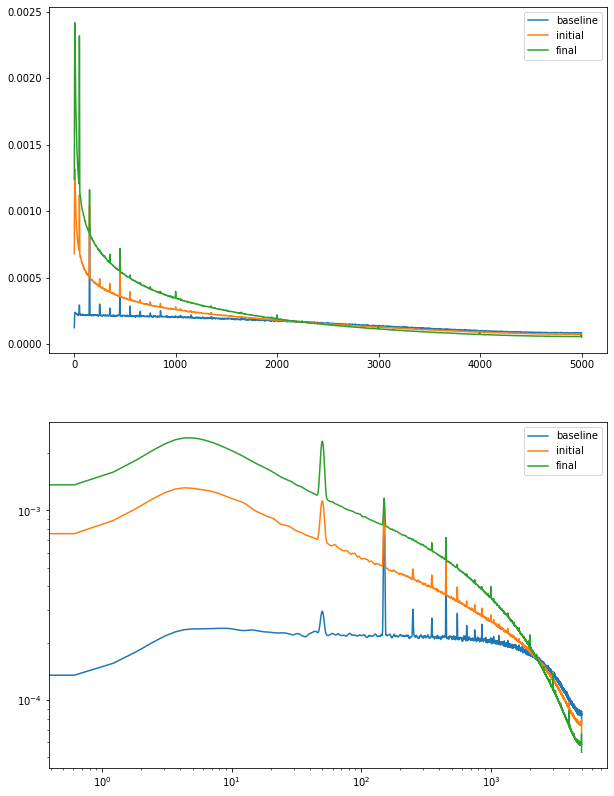

In [15]:
%matplotlib inline
fig = plt.figure(figsize=(10,14))
ax = fig.add_subplot(2,1,1)
ax.plot(vf,blinef,label='baseline')
ax.plot(vf,initialf,label='initial')
ax.plot(vf,finalf,label='final')
plt.legend()

ax = fig.add_subplot(2,1,2)
ax.plot(vf,blinef,label='baseline')
ax.plot(vf,initialf,label='initial')
ax.plot(vf,finalf,label='final')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()

In [85]:
spectra_list = []
for fname,kcltime in zip(fnames,kcltimes):
    print(fname)
    
    full_data = np.fromfile('forpyecog/'+fname+'/'+fname+'.bin',dtype ='float32')
    bline = full_data[0:kcltime*10000]
    initial = full_data[kcltime*10000:(kcltime+60*1030)*10000]
    final   = full_data[(kcltime+60*1030)*10000:(kcltime+60*90)*10000]
    
    vf,t,z = stft(bline,fs = 10000,nperseg=nfft/4,nfft=nfft,detrend='linear') # avoid time edge values
    blinef = np.mean(np.abs(z),axis=-1).ravel()

    vf,t,z = stft(initial,fs = 10000,nperseg=nfft/4,nfft=nfft,detrend='linear') # avoid time edge values
    initialf = np.mean(np.abs(z),axis=-1).ravel()

    vf,t,z = stft(final,fs = 10000,nperseg=nfft/4,nfft=nfft,detrend='linear') # avoid time edge values
    finalf = np.mean(np.abs(z),axis=-1).ravel()
    
    blinefn   = blinef/np.mean(blinef)
    initialfn = initialf/np.mean(blinef)
    finalfn   = finalf/np.mean(blinef)
    
    initialfchange = initialf/blinef
    finalfchange   = finalf/blinef
    
    spectra_list.append([blinef,initialf,finalf,blinefn,initialfn,finalfn,initialfchange,finalfchange])

220817_004


/home/mfpleite/anaconda3/envs/pyecog2PySide/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mfpleite/anaconda3/envs/pyecog2PySide/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


220817_005
220818_001
220818_002
220818_003
220818_005
220820_002
220820_003
220820_004
220822_001
220822_003


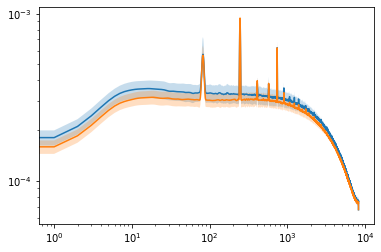

In [86]:
ctrl_bline = [spec[0] for i,spec in enumerate(spectra_list) if labels[i]==0]
intr_bline = [spec[0] for i,spec in enumerate(spectra_list) if labels[i]==1]

ax = st.plot_cis(np.array(ctrl_bline))
ax = st.plot_cis(np.array(intr_bline),ax = ax)
ax.set_yscale('log')
ax.set_xscale('log')

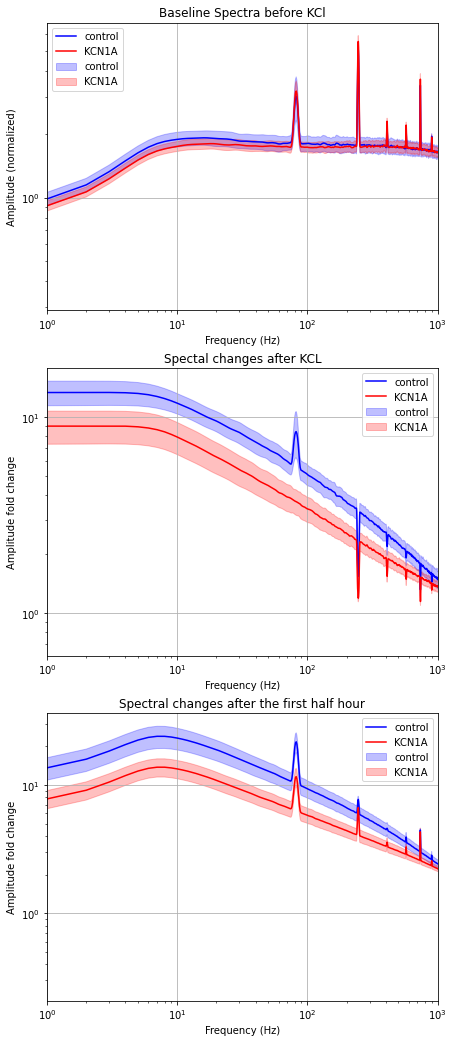

In [92]:

ctrl_blinef = [spec[3] for i,spec in enumerate(spectra_list) if labels[i]==0]
intr_blinef = [spec[3] for i,spec in enumerate(spectra_list) if labels[i]==1]

ctrl_initialfchange = [spec[6] for i,spec in enumerate(spectra_list) if labels[i]==0]
intr_initialfchange = [spec[6] for i,spec in enumerate(spectra_list) if labels[i]==1]

ctrl_finalfchange = [spec[7] for i,spec in enumerate(spectra_list) if labels[i]==0]
intr_finalfchange = [spec[7] for i,spec in enumerate(spectra_list) if labels[i]==1]

ctrl_finalfchange = [spec[4] for i,spec in enumerate(spectra_list) if labels[i]==0]
intr_finalfchange = [spec[4] for i,spec in enumerate(spectra_list) if labels[i]==1]


fig = plt.figure(figsize=(7,18))
ax = plt.subplot(3,1,1)
st.plot_cis(np.array(ctrl_blinef),ax =ax, label = 'control',color = 'b')
st.plot_cis(np.array(intr_blinef),ax = ax, label = 'KCN1A', color = 'r')
ax.set_xlim([1,1000])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (normalized)')
ax.legend()
ax.set_title('Baseline Spectra before KCl')
ax.grid()


ax0 = plt.subplot(3,1,2)
st.plot_cis(np.array(ctrl_initialfchange),ax =ax0, label = 'control',color = 'b')
st.plot_cis(np.array(intr_initialfchange),ax = ax0, label = 'KCN1A', color = 'r')
ax0.set_xlim([1,1000])
ax0.set_yscale('log')
ax0.set_xscale('log')
ax0.set_xlabel('Frequency (Hz)')
ax0.set_ylabel('Amplitude fold change')
ax0.legend()
ax0.set_title('Spectal changes after KCL')
# ax0.set_title('Spectral changes in the first half hour')
ax0.grid()

ax1 = plt.subplot(3,1,3)
st.plot_cis(np.array(ctrl_finalfchange),percent= False, ax = ax1, label = 'control',color = 'b')
st.plot_cis(np.array(intr_finalfchange),percent= False, ax = ax1, label = 'KCN1A', color = 'r')
ax1.set_xlim([1,1000])
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude fold change')
ax1.legend()
ax1.set_title('Spectral changes after the first half hour')
ax1.grid()

# fig.savefig('Spectra_2ax_1-1000Hz.svg')

In [19]:
ctrl_std_blinef = np.zeros(blinef.shape)
ctrl_std_initialf = np.zeros(initialf.shape)
ctrl_std_finalf = np.zeros(finalf.shape)
nctrl = 0

intr_std_blinef = np.zeros(blinef.shape)
intr_std_initialf = np.zeros(initialf.shape)
intr_std_finalf = np.zeros(finalf.shape)
nintr = 0


for i,(blinef,initialf,finalf) in enumerate(spectra_list):
    if labels[i]==1:
        nintr += 1
        intr_std_blinef += (blinef/np.mean(blinef) - intr_avg_blinef)**2
        intr_std_initialf += (initialf/np.mean(blinef) - intr_avg_initialf)**2
        intr_std_finalf += (finalf/np.mean(blinef) - intr_avg_finalf)**2
    elif labels[i]==0:
        nctrl +=1
        ctrl_std_blinef +=  (blinef/np.mean(blinef) - ctrl_avg_blinef)**2
        ctrl_std_initialf += (initialf/np.mean(blinef) - ctrl_avg_initialf)**2
        ctrl_std_finalf += (finalf/np.mean(blinef) - ctrl_avg_finalf)**2
    print(fnames[i])
    
ctrl_std_blinef = np.sqrt(ctrl_std_blinef/nctrl)
ctrl_std_initialf = np.sqrt(ctrl_std_initialf/nctrl)
ctrl_std_finalf = np.sqrt(ctrl_std_finalf/nctrl)

intr_std_blinef = np.sqrt(intr_std_blinef/nintr)
intr_std_initialf = np.sqrt(intr_std_initialf/nintr)
intr_std_finalf = np.sqrt(intr_std_finalf/nintr)

220817_004
220817_005
220818_001
220818_002
220818_003
220818_005
220820_002
220820_003
220820_004
220822_001
220822_003


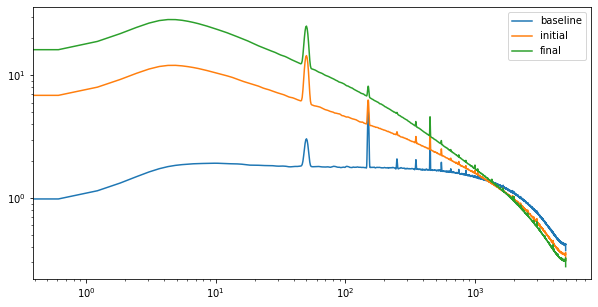

In [21]:
%matplotlib inline
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(vf,ctrl_avg_blinef,label='baseline')
ax.plot(vf,ctrl_avg_initialf,label='initial')
ax.plot(vf,ctrl_avg_finalf,label='final')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()

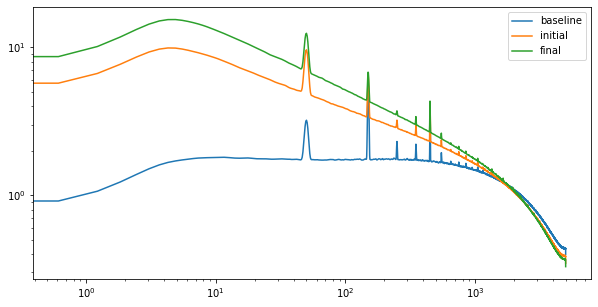

In [120]:
%matplotlib inline
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(vf,intr_avg_blinef,label='baseline')
ax.plot(vf,intr_avg_initialf,label='initial')
ax.plot(vf,intr_avg_finalf,label='final')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()

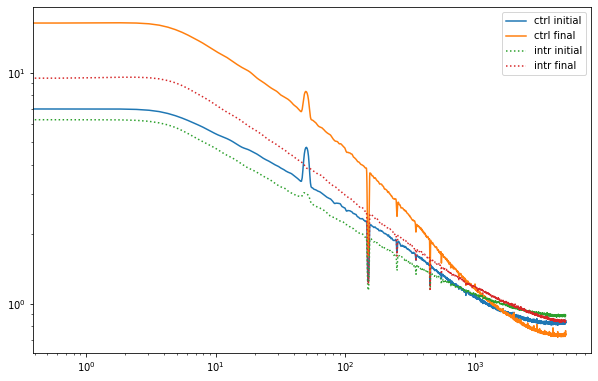

In [125]:
%matplotlib inline
fig = plt.figure(figsize=(10,14))

ax = fig.add_subplot(2,1,1)
ax.plot(vf,ctrl_avg_initialf/ctrl_avg_blinef,label='ctrl initial')
ax.plot(vf,ctrl_avg_finalf/ctrl_avg_blinef,label='ctrl final')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()

# ax = fig.add_subplot(2,1,2)
ax.plot(vf,intr_avg_initialf/intr_avg_blinef,':',label='intr initial')
ax.plot(vf,intr_avg_finalf/intr_avg_blinef,':',label='intr final')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()


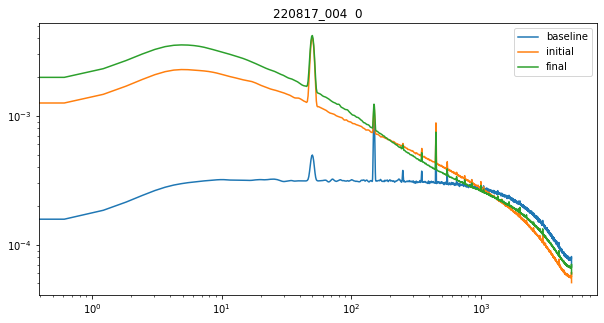

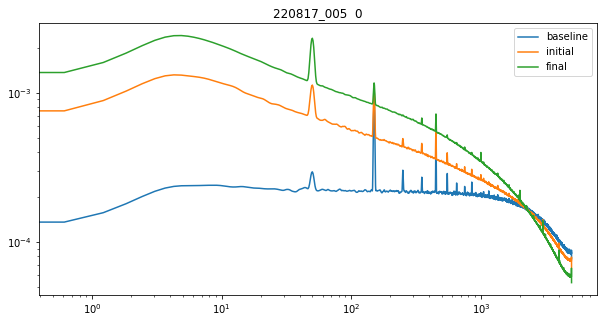

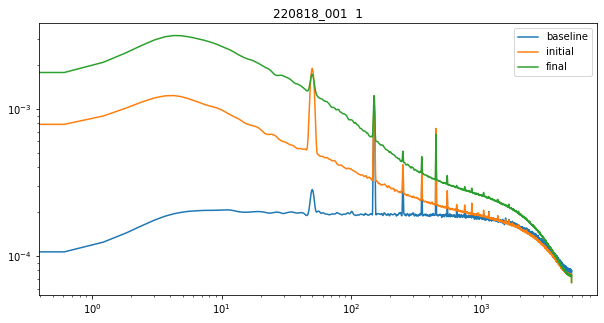

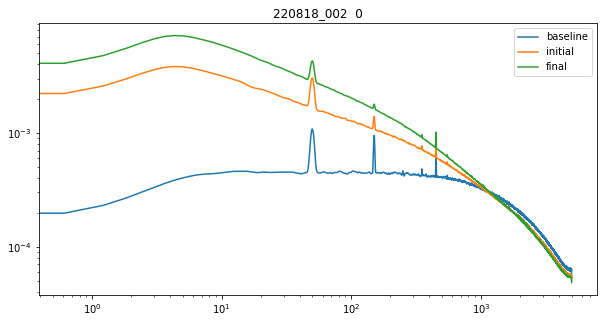

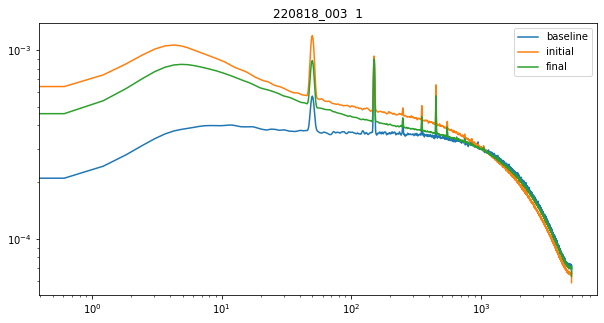

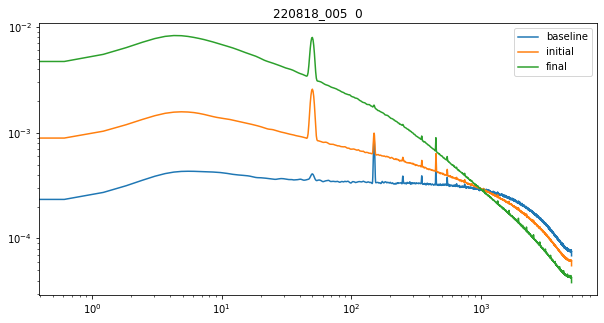

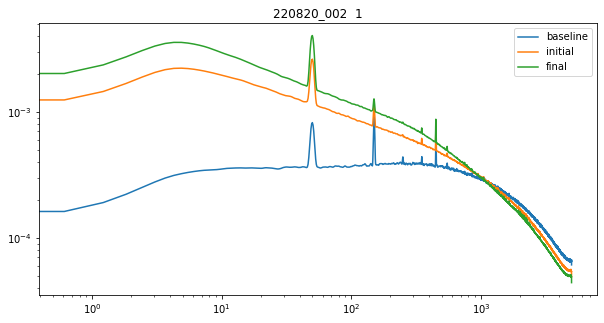

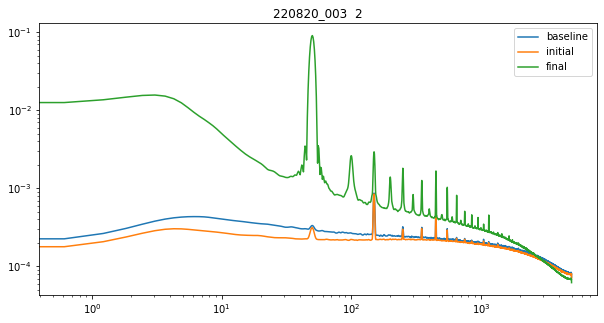

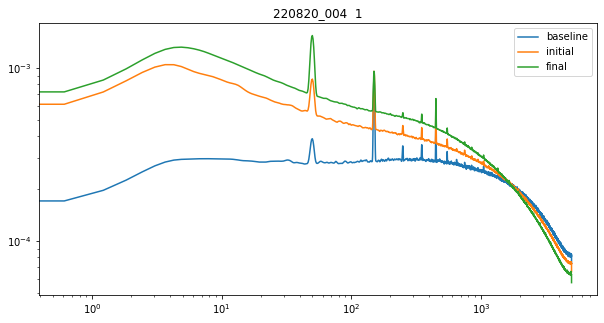

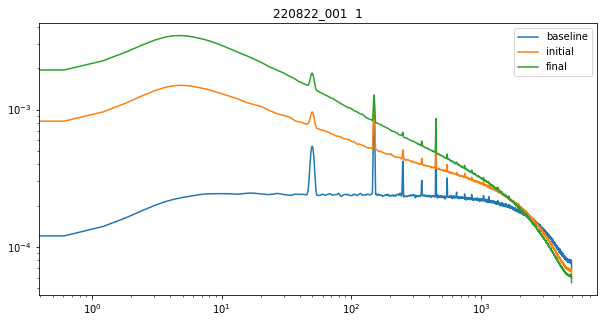

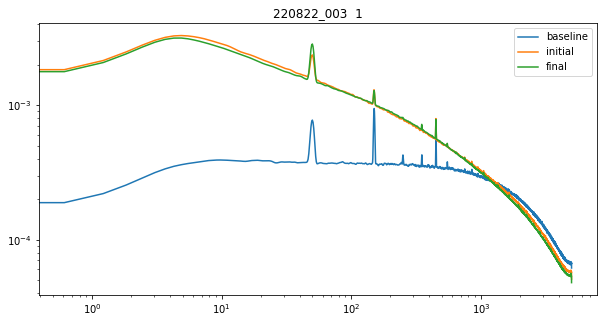

In [124]:

for i,(blinef,initialf,finalf) in enumerate(spectra_list):

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(vf,blinef,label='baseline')
    ax.plot(vf,initialf,label='initial')
    ax.plot(vf,finalf,label='final')
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.legend()
    plt.title(fnames[i] + '  ' +str(labels[i]))

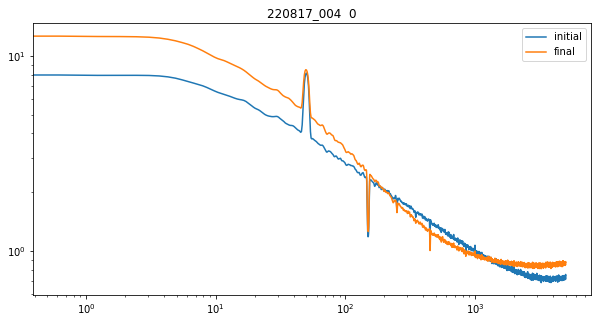

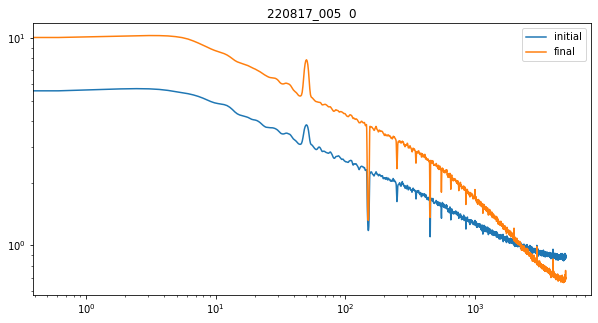

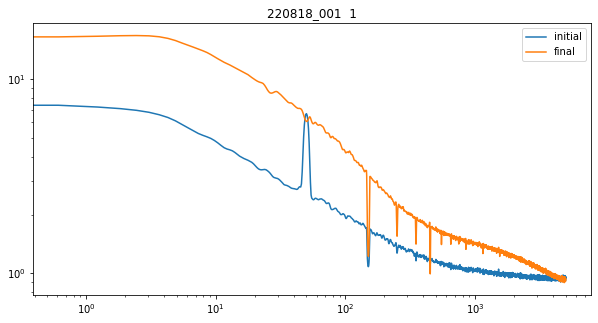

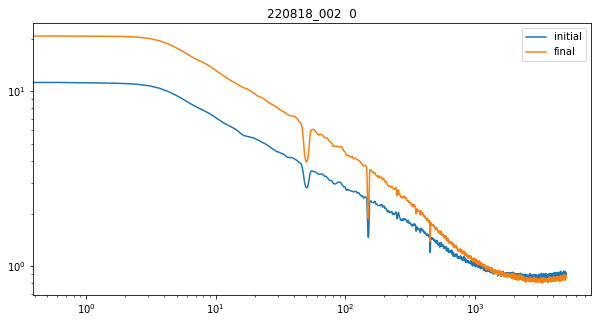

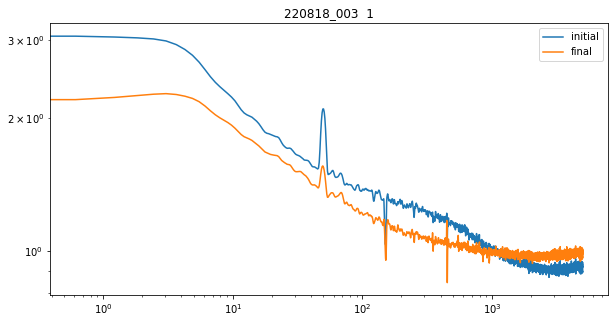

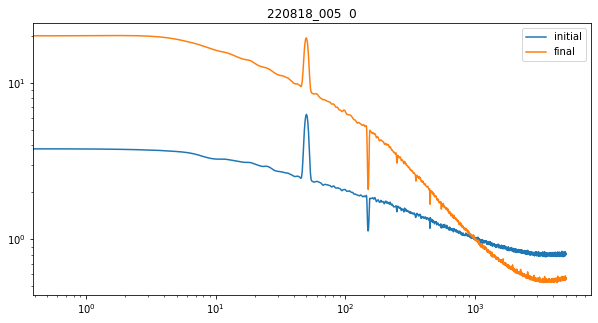

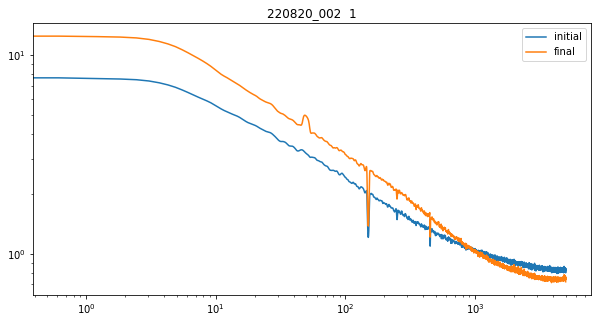

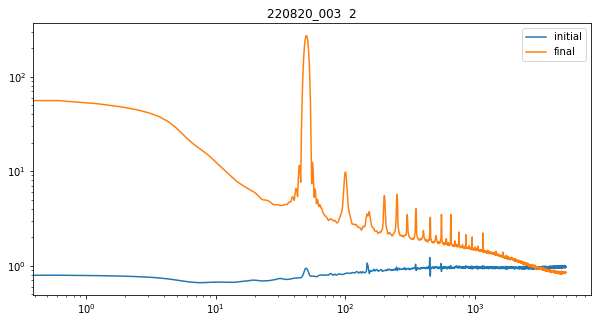

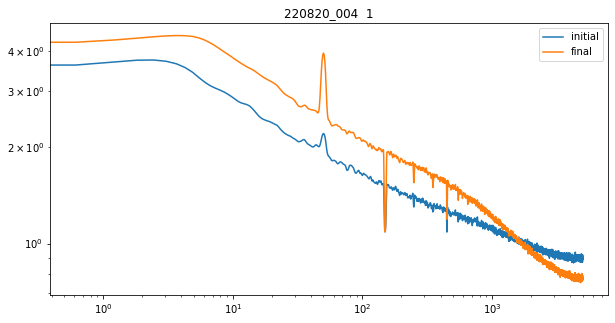

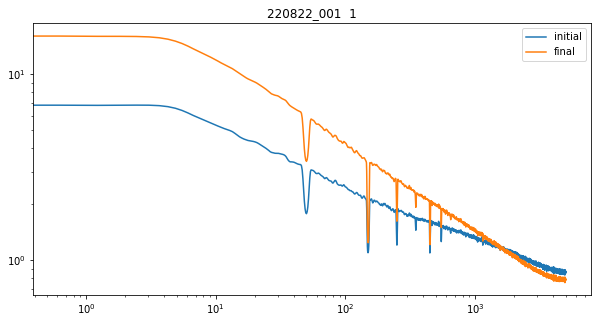

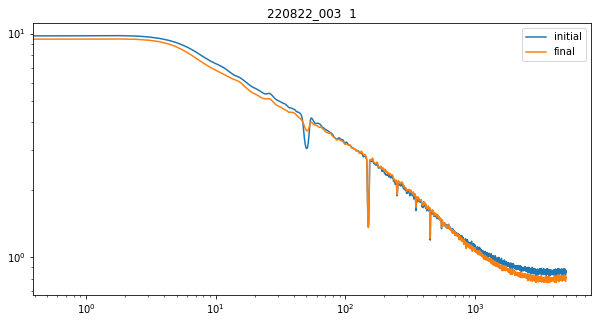

In [123]:
for i,(blinef,initialf,finalf) in enumerate(spectra_list):

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)
#     ax.plot(vf,blinef,label='baseline')
    ax.plot(vf,initialf/blinef,label='initial')
    ax.plot(vf,finalf/blinef,label='final')
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.legend()
    plt.title(fnames[i] + '  ' +str(labels[i]))

In [188]:
with open('forpyecog/'+fname+'/'+fname+'.fmeta', 'r') as json_file:
    metadata = json.load(json_file)
metadata


{'channel_labels': ['min',
  'max',
  'mean',
  'log std',
  'kurtosis',
  'skewness',
  'log coastline (log sum of abs diff)',
  'log power in band (1, 4) Hz',
  'log power in band (4, 8) Hz',
  'log power in band (8, 12) Hz',
  'log power in band (12, 30) Hz',
  'log power in band (30, 50) Hz',
  'log power in band (50, 70) Hz',
  'log power in band (70, 120) Hz',
  'Spectrum entropy'],
 'data_format': 'float64',
 'duration': 6038.450317600001,
 'fs': 0.2,
 'no_channels': 15,
 'start_timestamp_unix': 0,
 'transmitter_id': '220822_003',
 'volts_per_bit': 0}

220817_004
220817_005
220818_001
220818_002
220818_003
220818_005
220820_002
220820_003
220820_004
220822_001
220822_003


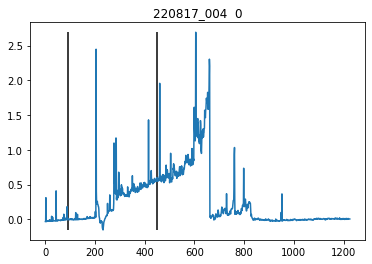

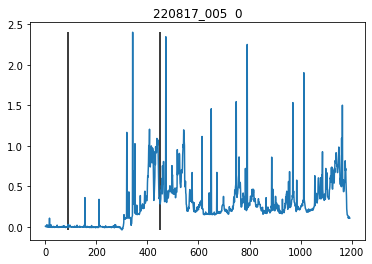

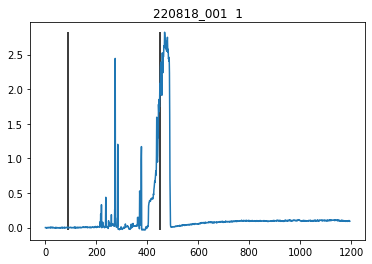

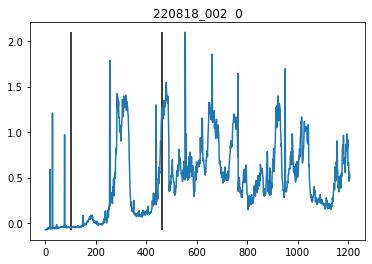

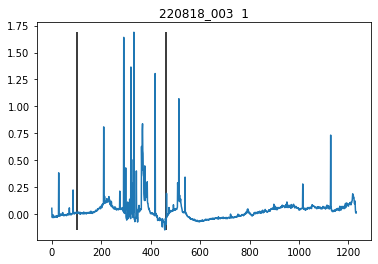

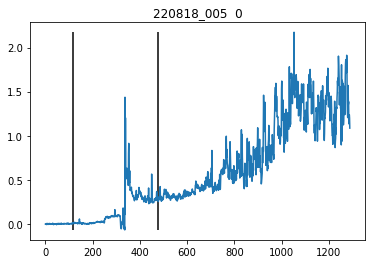

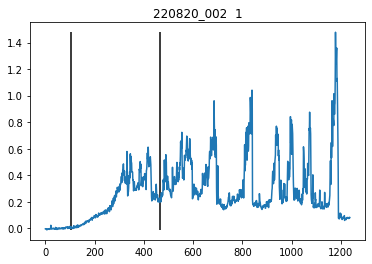

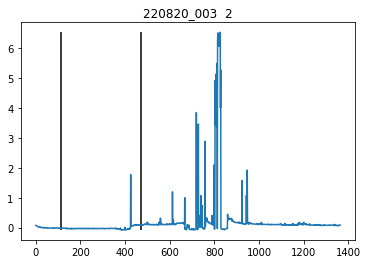

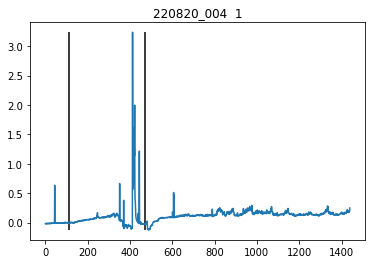

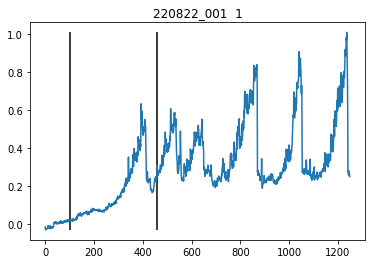

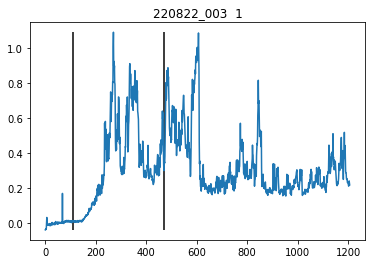

In [66]:

for label ,fname,kcltime in zip(labels,fnames,kcltimes):
    print(fname)
    feature_data = np.fromfile('forpyecog/'+fname+'/'+fname+'.features',dtype ='float64')
    feature_data = feature_data.reshape(-1,15)
    bline = feature_data[0:int(kcltime/5),:]
    initial = feature_data[int(kcltime/5):int((kcltime+60*30)/5),:]
    final   = feature_data[int((kcltime+60*30)/5):int((kcltime+60*90)/5),:]
    
    feature = 3
    plt.figure()
    signal = feature_data[:-1,feature]-np.log(np.mean(np.exp(bline[:-1,feature])))
    plt.plot(signal)
    
    plt.vlines((int(kcltime/5), int((kcltime+60*30)/5)),np.min(signal),np.max(signal),'k')
    
    plt.title(fname + '  ' +str(label))